# E-Commerce Sales Analysis

<b> Problem Statement:</b> 
<br>Analyze sales data to identify customer segments and provide actionable insights to optimize sales and improve profitability  for an e-commerce company.


<b>Area to focus on:</b>
* Customer Segmentation
* Sales Analysis
* Profitability Analysis
* Shipping Analysis



## Dataset Overview

In [30]:
#Importating Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
#Reading .csv data file

df = pd.read_csv('ECommerceSales.csv',encoding='cp1252',index_col=0)

In [32]:
#Intial onservation 

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
#Checking the numbr of rows and columns

num_rows,num_columns = df.shape
print("Number of Rows:",num_rows)
print("Number of Columns:",num_columns)

Number of Rows: 9994
Number of Columns: 20


In [34]:
#Creating a table for missing values, unique values and data type of the features

#Missing values dataframe
missing_values = pd.DataFrame({'Feature': df.columns,'No. of Missing Values': df.isnull().sum().values})

#Unique values dataframe
unique_values = pd.DataFrame({'Feature': df.columns,'No. of Unique Values': df.nunique().values})

#DataType dataframe
feature_type = pd.DataFrame({'Feature':df.columns,'DataType':df.dtypes})

#Merge the dataframe

merge_df = pd.merge(missing_values,unique_values, on='Feature',how='left')
merge_df= merge_df.merge(feature_type,on='Feature',how='left')
merge_df

,Feature,No. of Missing Values,No. of Unique Values,DataType
0,Order ID,0,5009,object
1,Order Date,0,1237,object
2,Ship Date,0,1334,object
3,Ship Mode,0,4,object
4,Customer ID,0,793,object
5,Customer Name,0,793,object
6,Segment,0,3,object
7,Country,0,1,object
8,City,0,531,object
9,State,0,49,object


In [35]:
#Count duplicate rows in data

duplicates  = df.duplicated().sum()
print("Number of duplicate rows:",duplicates)

Number of duplicate rows: 1


In [36]:
#Having a look at the description of all the numerical columns present in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976



# Data Preprocessing

In [37]:
#Columns for year month

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [38]:
#Maximum value in the 'Order Date ' column
max_order_date = df['Order Date'].max()

#Minimum value in the "Order Date" column
min_order_date = df['Order Date'].min()

print('Maximum Order Date:', max_order_date)
print('Minimum Order Date:', min_order_date)

Maximum Order Date: 2017-12-30 00:00:00
Minimum Order Date: 2014-01-03 00:00:00


In [39]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

day_of_week_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

df['Order Day of Week'] = df['Order Date'].dt.day_of_week.apply(lambda x: day_of_week_names[x])





# Customer Segementation

* What are the types of customers in each segment? 
* What are the sales per customer segment?
* Identifying which are the repeating customers and what are their purchasing behavior?
* Which are the top customers in terms of sales?


###  What are types of customers in each segment?

In [40]:
#Types of Customer

type_of_cust = df['Segment'].unique()
print(type_of_cust)

['Consumer' 'Corporate' 'Home Office']


In [41]:
# Nummber of customer in each segment

no_of_cust = df['Segment'].value_counts()
print(no_of_cust)

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


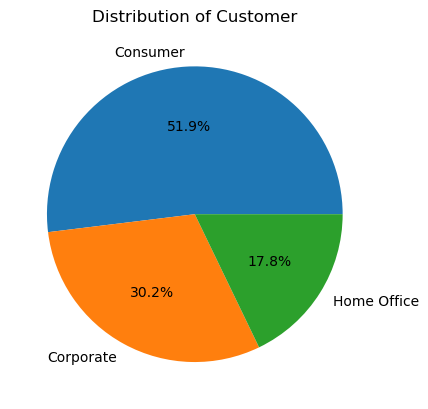

In [42]:
#Plotting pie chart

plt.pie(no_of_cust,autopct = '%1.1f%%',labels = type_of_cust)
plt.title('Distribution of Customer')
plt.show()

### What are the sales per each customer segemnt? 

In [43]:
sales_per_seg = df.groupby('Segment')['Sales'].sum()

sales_per_seg

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

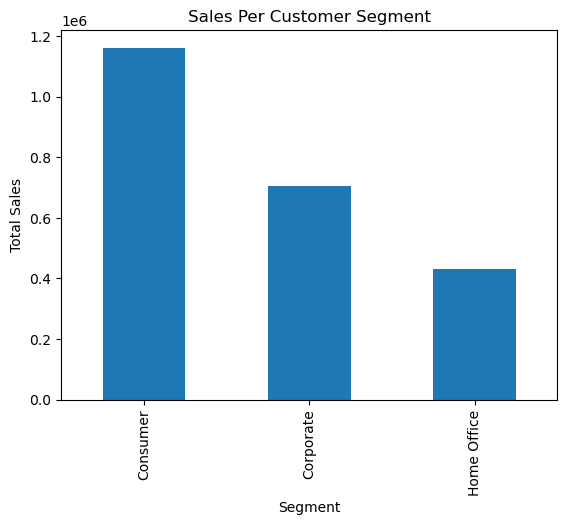

In [44]:
#Plot a bar graph

sales_per_seg.plot(kind= 'bar', title = 'Sales Per Customer Segment')
plt.ylabel('Total Sales')
plt.show()




###  Identifying which are the repeating customers and what are their purchasing behavior?




In [45]:
df.head(3)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Day of Week
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,8,Monday
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,8,Monday
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,2016,6,12,Saturday


In [46]:
#Grouping data by Customer ID, Customer Name, Segment to calculate frequency of their order, then sort the data in descending order

cust_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().sort_values(ascending=False).reset_index()

#Rename the Order ID column
cust_order_freq.rename(columns={'Order ID':'Total Orders'},inplace = True)

#print the top 10 result
print(cust_order_freq.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    PP-18955           Paul Prost  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    MA-17560         Matt Abelman  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


### Identifying which are the top customers in terms of sales?

In [47]:
#Group data based on customer id, customer name and sales, then sorting the data by sales in descending order

cust_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().sort_values(ascending=False).reset_index()

#print the top 10 result
print(cust_sales.head(10).reset_index(drop= True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


# Sales and Profitability Analysis

* What are the overall sales and profitability trends over time (Yearly)?
* How do sales and Profitability vary across different regions, cities, and states?
* Which product categories and subcategories contribute the most to sales revenue and profitability?
* Identify cities and states with least profitability.
* How does discounting impact sales and profitability?




### What are the overall sales and profitability trends over time(yearly)?

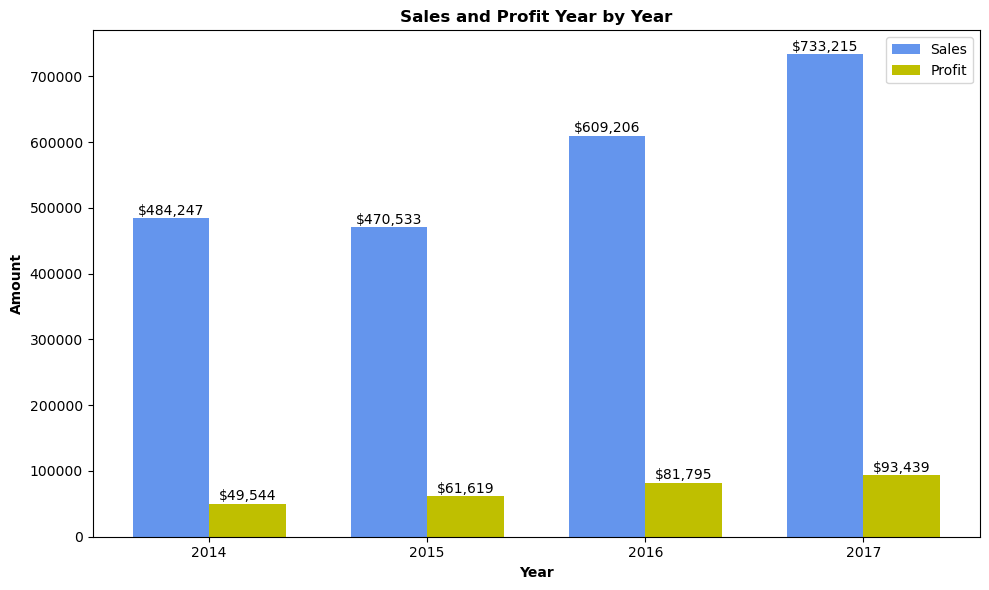

In [48]:
#Grouping by year and summing sales and profit
yearly_data = df.groupby('Order Year').agg({'Sales': 'sum','Profit':'sum'}).reset_index()

#plotting the grouped bar plot
plt.figure(figsize = (10,6))

#Width of each bar
bar_width = 0.35

#X-axis values
years = yearly_data['Order Year']

#Plotting Sales
sales_bars = plt.bar(years - bar_width/2,yearly_data['Sales'],bar_width,label ='Sales',color = 'cornflowerblue')

#Plotting Profit
profit_bars = plt.bar(years + bar_width/2,yearly_data['Profit'],bar_width,label = 'Profit',color ='y')

#Adding labels to bars

#For loop for Sales label
for i, sales in enumerate(yearly_data['Sales']):
    plt.text(years[i] - bar_width/2,sales + 1000, f'${sales:,.0f}', ha ='center',va='bottom')
#For loop for Profit label
for i,profit in enumerate(yearly_data['Profit']):
    plt.text(years[i] + bar_width/2, profit +1000,f"${profit:,.0f}" ,ha='center', va='bottom')
    
#Formatting the plot by adding title, labels and legend
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel("Amount",fontweight = 'bold')
plt.title('Sales and Profit Year by Year',fontweight = 'bold')
plt.xticks(years)
plt.legend()

#Display the plot

plt.tight_layout()
plt.show()



### How do Sales and Profitability vary across different cities and States?
    

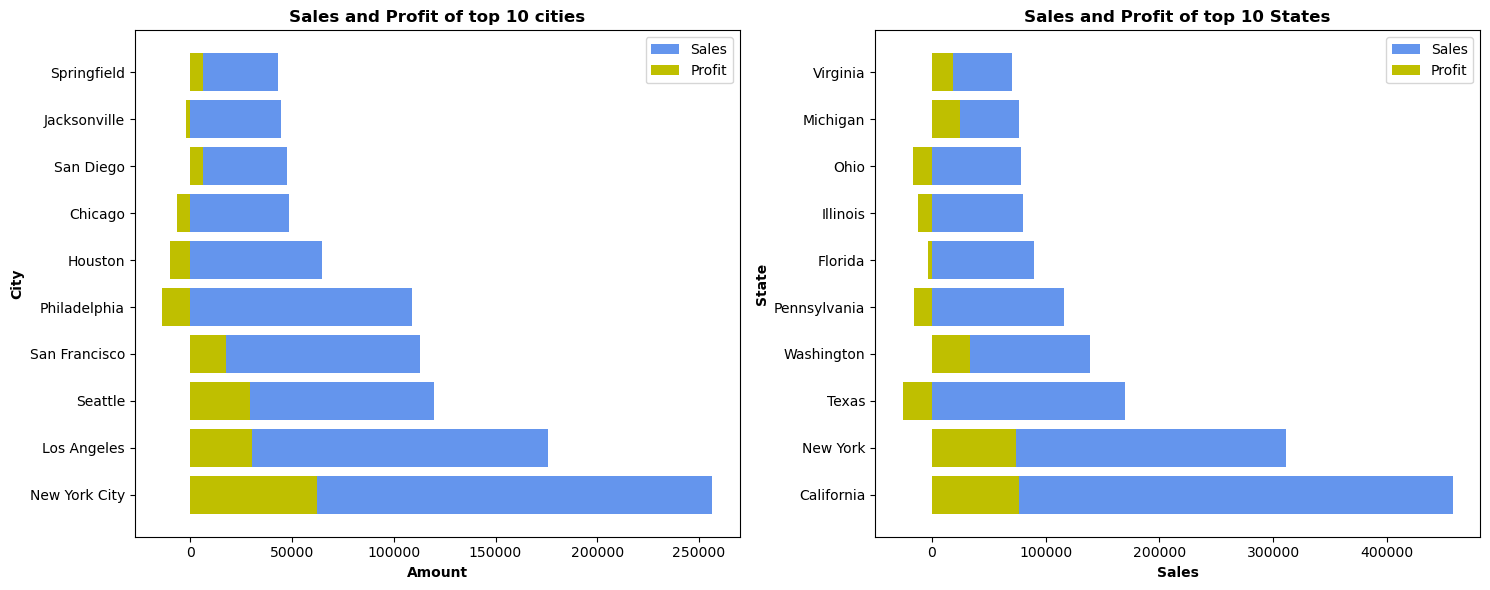

In [22]:
#Grouping by city and summing sales and profit,then sorting by sales in descending oder and selecting top 10

top_cities = df.groupby('City').agg({'Sales':'sum','Profit':'sum'}).sort_values(by='Sales',ascending = False).head(10)

#Grouping by state and summing sales and profit,then sorting by sales in descending order and selecting the top 10
top_states = df.groupby('State').agg({'Sales':'sum','Profit':'sum'}).sort_values(by='Sales',ascending = False).head(10)

#Creating subplots with 1 row and 2 columns
fig, ax = plt.subplots(1,2,figsize=(15,6))

def plot_graph(a,x,y,color,label,xlabel,ylabel,title):
    ax[a].barh(x,y,color=color,label=label)
    ax[a].set_xlabel(xlabel,fontweight='bold')
    ax[a].set_ylabel(ylabel,fontweight = 'bold')
    ax[a].set_title(title,fontweight='bold')
    ax[a].legend()

plot_graph(0,top_cities.index,top_cities['Sales'],'cornflowerblue','Sales',"Amount",'City','Sales and Profit of top 10 Cities')
plot_graph(0,top_cities.index,top_cities['Profit'],'y','Profit','Amount','City','Sales and Profit of top 10 cities')

plot_graph(1,top_states.index, top_states['Sales'],'cornflowerblue','Sales','Amount','State','Sales and Profit of top 10 States')
plot_graph(1,top_states.index, top_states['Profit'],'y','Profit','Sales','State','Sales and Profit of top 10 States')

plt.tight_layout()
plt.show()


### How do Sales and Profitability vary across different Regions?

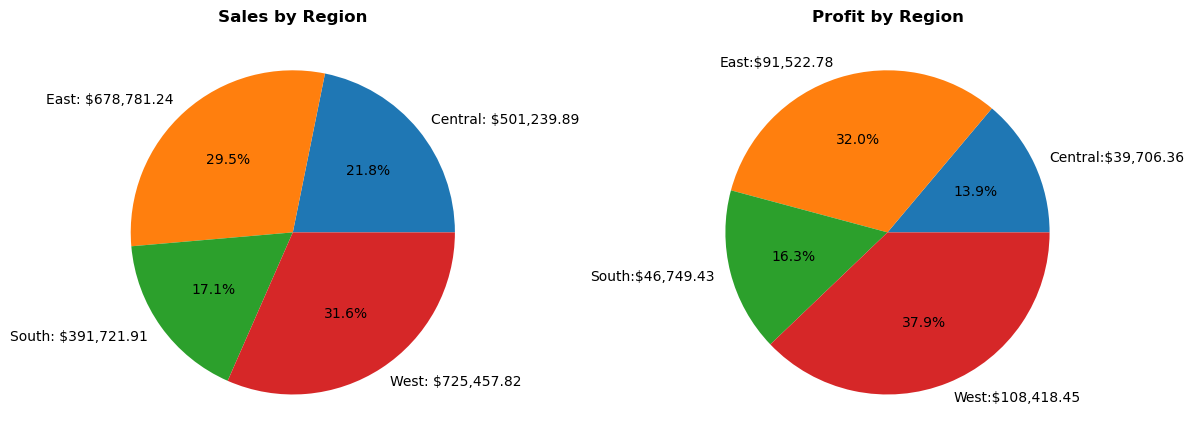

In [23]:
#Grouping by region and summing sales and profit
region_data = df.groupby('Region').agg({'Sales':'sum','Profit':'sum'})

#Pie chart for Sales by Region
fig, ax = plt.subplots(1,2,figsize=(12,8))
sales_labels =[f'{region}: ${sales:,.2f}' for region ,sales in zip(region_data.index,region_data['Sales'])]
ax[0].pie(region_data['Sales'],labels=sales_labels,autopct = '%1.1f%%')
ax[0].set_title('Sales by Region', fontweight = 'bold')

#Pie chart for Profit by Region
profit_labels = [f"{region}:${profit:,.2f}" for region , profit in zip(region_data.index, region_data['Profit'])]
ax[1].pie(region_data['Profit'],labels = profit_labels, autopct = '%1.1f%%')
ax[1].set_title('Profit by Region', fontweight = 'bold')

plt.tight_layout()
plt.show()



### Which product categories and sub-categories contribute the most to sales revenue?

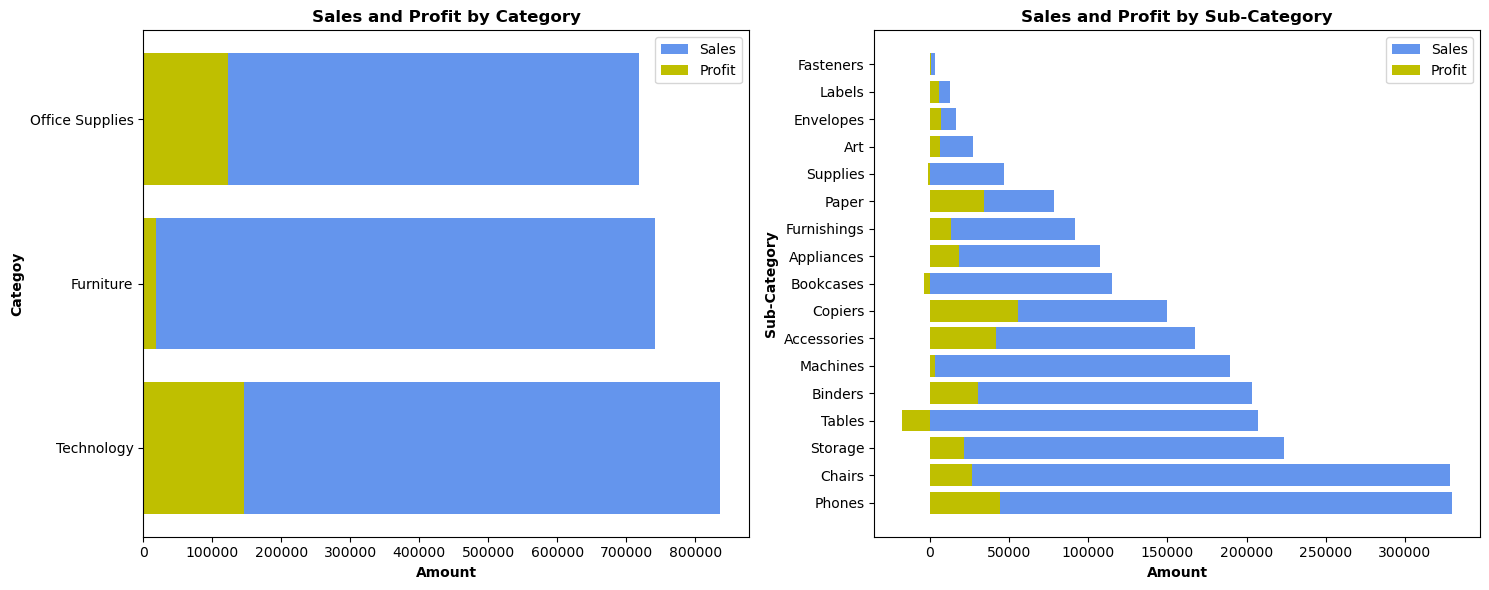

In [36]:
#Grouping by category and summing sales and profit
category_data = df.groupby('Category').agg({'Sales':'sum','Profit':'sum'}).sort_values(by='Sales',ascending=False)

#Grouping by sub-category and summing sales and profit
sub_category_data = df.groupby('Sub-Category').agg({'Sales':'sum','Profit':'sum'}).sort_values(by='Sales',ascending=False)

#Creating subplots with 1 row and 2 columns
fig, ax = plt.subplots(1,2,figsize=(15,6))

#Calling the plot_graph function for Category
plot_graph(0,category_data.index,category_data['Sales'],'cornflowerblue','Sales','Amount','Category','Sales and Profit by Category')
plot_graph(0,category_data.index,category_data['Profit'],'y','Profit','Amount','Categoy','Sales and Profit by Category')

#Calling the plot_graph function for Sub-Category
plot_graph(1,sub_category_data.index,sub_category_data['Sales'],'cornflowerblue','Sales','Amount','Sub-Category','Sales and Profit by Sub-Category')
plot_graph(1,sub_category_data.index,sub_category_data['Profit'],'y','Profit','Amount','Sub-Category','Sales and Profit by Sub-Category')

#Display the plot
plt.tight_layout()
plt.show()

### Identify cities and states with least profitability.

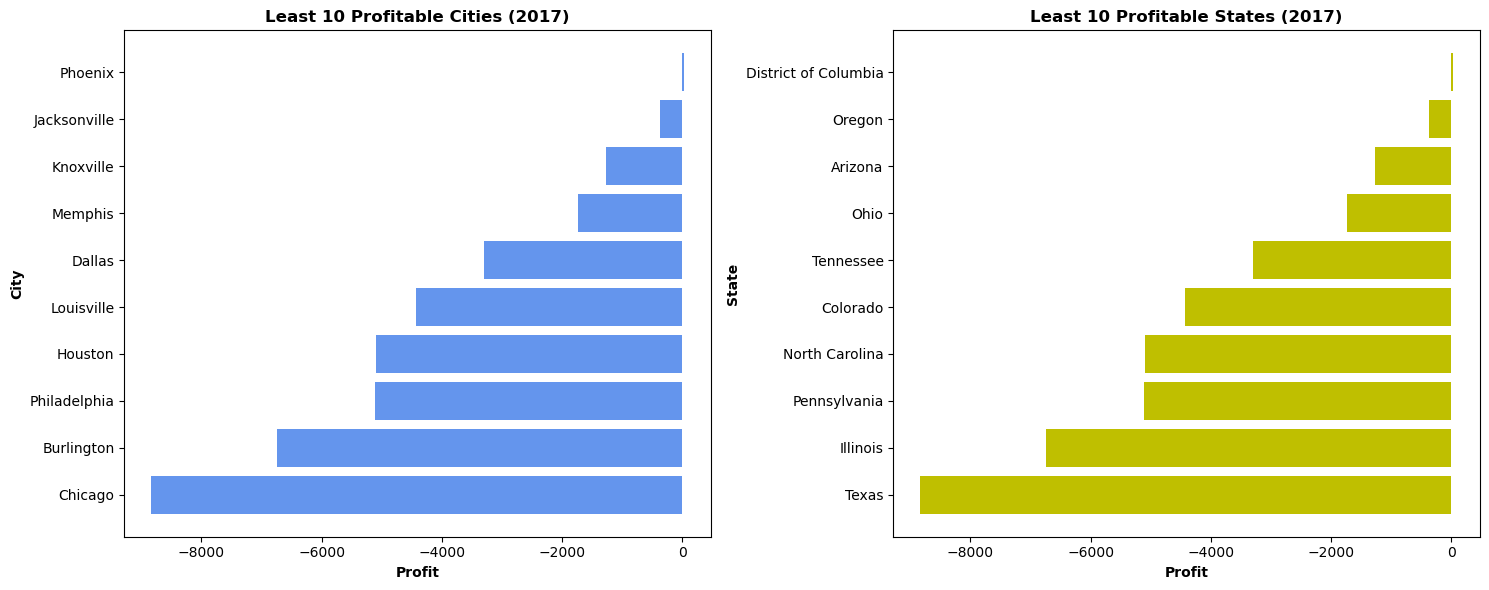

In [47]:
#Filter data for the year 2017

df_2017 = df[df['Order Year'] == 2017]

#Grouping citites and summing profit for 2017, then sorting profit in ascending order and selecting bottom 10 cities
bottom_cities_2017 = df_2017.groupby('City').agg({'Profit':'sum'}).sort_values(by='Profit').head(10)

#Grouping states and summing profit for 2017, then sorting profit in ascending order and selecting bottom 10 states
bottom_states_2017 = df_2017.groupby('State').agg({'Profit':'sum'}).sort_values(by='Profit').head(10)

#Creating subplots with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize =(15,6))

#Plotting bottom 10 cities for 2017
ax[0].barh(bottom_cities_2017.index,bottom_states_2017['Profit'],color = 'cornflowerblue')
ax[0].set_xlabel('Profit',fontweight='bold')
ax[0].set_ylabel('City',fontweight='bold')
ax[0].set_title("Least 10 Profitable Cities (2017)",fontweight='bold')

#Plotting bottom 10 states for 2017
ax[1].barh(bottom_states_2017.index,bottom_states_2017['Profit'],color='y')
ax[1].set_xlabel('Profit',fontweight='bold')
ax[1].set_ylabel('State',fontweight='bold')
ax[1].set_title("Least 10 Profitable States (2017)",fontweight ='bold')

#Display the plot
plt.tight_layout()
plt.show()

### How does discounting impact sales and profitability?

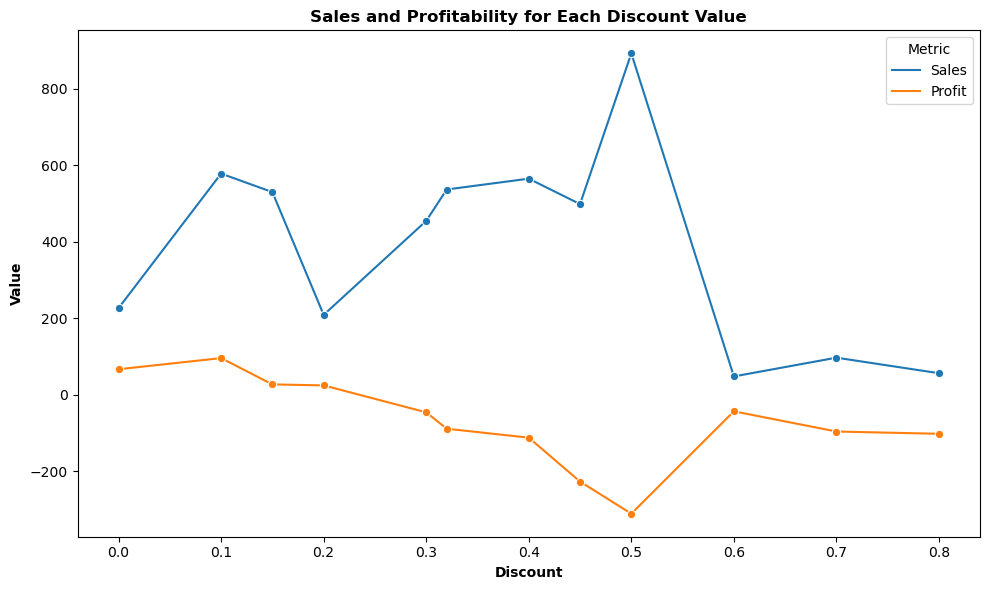

In [58]:
#Grouping the dataframe by discount and calculate the mean of Sales and Profit
discount_stats = df.groupby('Discount').agg({'Sales':'mean','Profit':'mean'}).reset_index()

# Melt dataframe tolong format for easy plotting
discount_stats_long = discount_stats.melt(id_vars='Discount',var_name = 'Metric',value_name = 'Value')

#Creating a comnined line plot for sales and profitability of each discount value
plt.figure(figsize = (10,6))
sns.lineplot(data=discount_stats_long, x='Discount',y='Value',hue='Metric',marker='o')
plt.title('Sales and Profitability for Each Discount Value',fontweight = 'bold')
plt.xlabel('Discount',fontweight ='bold')
plt.ylabel('Value',fontweight = 'bold')

#display the plot
plt.tight_layout()
plt.show()


# Shipping Analysis

* Which shipping modes are preferred by different customer segments?
* How does shipping time vary across different shipping modes?


In [24]:
#Calculate shipping time (difference between 'Ship Date' and 'Order Date')
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days


### Which shipping modes are preferred by different customer segements?

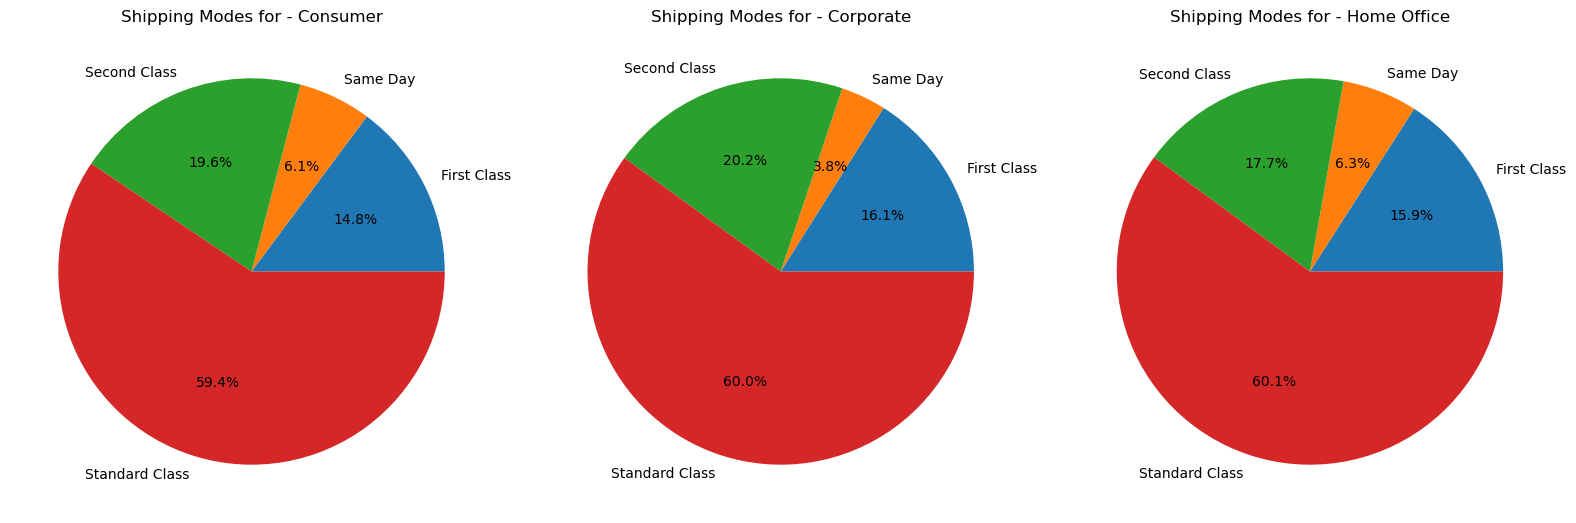

In [25]:
#grouping by segment and ship mode and counting occcurrences
shipping_data = df.groupby(['Segment','Ship Mode']).size().unstack(fill_value =0)

#Pie chart for preferred shiping mode by segment
fig,ax = plt.subplots(1,3, figsize=(16,6))

for i,segment in enumerate(shipping_data.index):
    ax[i].pie(shipping_data.loc[segment],labels = shipping_data.columns,autopct='%1.1f%%')
    ax[i].set_title(f'Shipping Modes for - {segment}')
    
#Display the plot
plt.tight_layout()
plt.show()

### How does shipping time vary across different shipping modes?

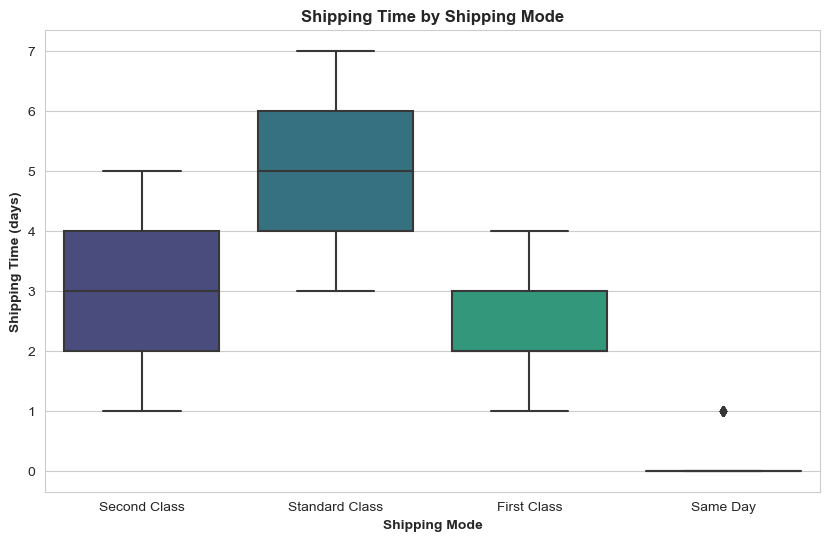

In [26]:
#Set the style of seaborn
sns.set_style('whitegrid')

#Create box plot fo shipping time by shipping mode 
plt.figure(figsize =(10,6))
sns.boxplot(data = df, x='Ship Mode',y='Shipping Time',palette='viridis')
plt.title('Shipping Time by Shipping Mode',fontweight='bold')
plt.xlabel('Shipping Mode',fontweight ='bold')
plt.ylabel('Shipping Time (days)', fontweight ='bold')

#Display the plot
plt.show()